In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import scipy.stats as sstats
from sklearn.model_selection import train_test_split
from sklearn.cluster import Birch
from sklearn.metrics import confusion_matrix
from sklearn import (datasets, decomposition, ensemble, manifold, random_projection)
from sklearn.naive_bayes import MultinomialNB
import tqdm

In [2]:
def accuracy_plot(axs, accs):
    plt.figure()
    plt.plot(axs, accs)
    
def KNN(train_X, train_Y, test_X, ks, verbose=False):
    """
    Compute predictions for various k
    Args:
        train_X: array of shape Ntrain x D
        train_Y: array of shape Ntrain
        test_X: array of shape Ntest x D
        ks: list of integers
    Returns:
        preds: dict k: predictions for k
    """
    # Cats data to float32
    train_X = train_X.astype(np.float32)
    test_X = test_X.astype(np.float32)

    # Alloc space for results
    preds = {}
    

    if verbose:
        print("Computing distances... ", end='')
    
    dists = -2 * np.dot(train_X, test_X.T) + np.sum(test_X**2, axis=1) + np.sum(train_X**2, axis=1)[:, np.newaxis]
    
    if verbose:
        print("Sorting... ", end='')

    closest = np.argsort(dists, axis=0)

    if verbose:
        print("Computing predictions...", end='')
    
    targets = train_Y[closest]

    for k in ks:
        predictions = sstats.mode(targets[:k])[0]
        predictions = predictions.ravel()
        preds[k] = predictions
    if verbose:
        print("Done")
    return preds

In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

data_batch_1 = unpickle('cifar10/data_batch_1')


db1_labels = np.array(data_batch_1[b'labels'])
db1_data = np.array(data_batch_1[b'data'])

trainx, testx, trainy, testy = train_test_split(db1_data, db1_labels, test_size=0.33)

  0%|                                                                            | 0/8 [00:00<?, ?it/s]

KPCA


 12%|████████▌                                                           | 1/8 [00:33<03:51, 33.05s/it]

KNN accuracy: 30.0 % on 10 axes


 25%|█████████████████                                                   | 2/8 [01:05<03:17, 32.84s/it]

KNN accuracy: 30.0 % on 13 axes


 38%|█████████████████████████▌                                          | 3/8 [01:38<02:44, 32.93s/it]

KNN accuracy: 31.0 % on 16 axes


 50%|██████████████████████████████████                                  | 4/8 [02:11<02:11, 32.90s/it]

KNN accuracy: 31.0 % on 19 axes


 62%|██████████████████████████████████████████▌                         | 5/8 [02:44<01:38, 32.96s/it]

KNN accuracy: 31.0 % on 22 axes


 75%|███████████████████████████████████████████████████                 | 6/8 [03:18<01:06, 33.22s/it]

KNN accuracy: 31.0 % on 25 axes


 88%|███████████████████████████████████████████████████████████▌        | 7/8 [03:50<00:32, 32.93s/it]

KNN accuracy: 31.0 % on 28 axes


100%|████████████████████████████████████████████████████████████████████| 8/8 [04:23<00:00, 32.96s/it]

KNN accuracy: 32.0 % on 31 axes


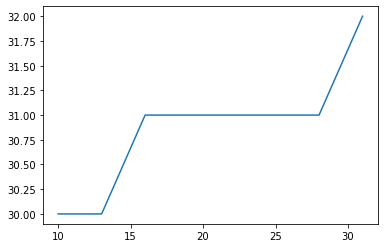

In [10]:
def kpca():
    print("KPCA")
    OS = np.arange(10,33,3)

    accs = []
    for oss in tqdm.tqdm(OS):
        kpca = decomposition.KernelPCA(n_components=oss, kernel="poly", gamma=0.01)
        x_proj = kpca.fit_transform(trainx)
        x_test_proj = kpca.transform(testx)
        knn = KNN(x_proj, trainy, x_test_proj, [7])

    #     sum_up(knn[7], testy)
        temp_acc = np.round(np.count_nonzero(knn[7] == testy)/len(testy),2)*100
        accs.append(temp_acc)
        print(f"KNN accuracy: {temp_acc} % on {oss} axes")

    accuracy_plot(OS, accs)
    
kpca()

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

Isomap


 17%|█████████████▊                                                                     | 1/6 [06:06<30:31, 366.33s/it]

KNN accuracy: 13.0 % on 1 neighbours


 33%|███████████████████████████▋                                                       | 2/6 [13:01<25:23, 380.86s/it]

KNN accuracy: 17.0 % on 6 neighbours


 50%|█████████████████████████████████████████▌                                         | 3/6 [20:01<19:37, 392.62s/it]

KNN accuracy: 17.0 % on 11 neighbours


 67%|███████████████████████████████████████████████████████▎                           | 4/6 [27:07<13:25, 402.71s/it]

KNN accuracy: 18.0 % on 16 neighbours


 83%|█████████████████████████████████████████████████████████████████████▏             | 5/6 [34:17<06:50, 410.84s/it]

KNN accuracy: 18.0 % on 21 neighbours


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [41:39<00:00, 416.54s/it]

KNN accuracy: 18.0 % on 26 neighbours


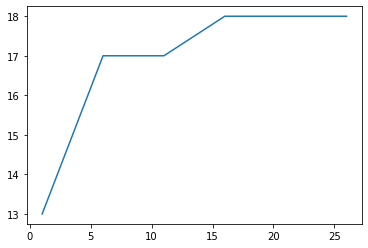

In [4]:
def isomap():
    print("Isomap")
    OS = np.arange(1,30,5)

    accs = []
    for oss in tqdm.tqdm(OS):
        iso = manifold.Isomap(n_components=2, n_neighbors=oss)
        x_proj = iso.fit_transform(trainx)
        x_test_proj = iso.transform(testx)
        knn = KNN(x_proj, trainy, x_test_proj, [7])

        temp_acc = np.round(np.count_nonzero(knn[7] == testy)/len(testy),2)*100
        accs.append(temp_acc)
        print(f"KNN accuracy: {temp_acc} % on {oss} neighbours")

    accuracy_plot(OS, accs)
    
isomap()

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

LLE


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [06:47<00:00, 407.32s/it]

KNN accuracy: 23.0 % on 10 axes


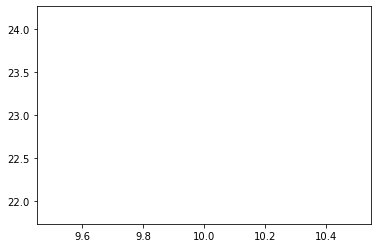

In [5]:
def lle():
    print("LLE")
    OS = np.arange(10,11,1)

    accs = []
    for oss in tqdm.tqdm(OS):
        X_lle = manifold.LocallyLinearEmbedding(n_neighbors=oss, n_components=10)
        x_proj = X_lle.fit_transform(trainx)
        x_test_proj = X_lle.transform(testx)
        knn = KNN(x_proj, trainy, x_test_proj, [7])

        temp_acc = np.round(np.count_nonzero(knn[7] == testy)/len(testy),2)*100
        accs.append(temp_acc)
        print(f"KNN accuracy: {temp_acc} % on {oss} axes")

    accuracy_plot(OS, accs)
    
lle()

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

MDS


 50%|█████████████████████████████████████████▌                                         | 1/2 [05:37<05:37, 337.38s/it]

KNN accuracy: 13.0 % on 1 components


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [14:01<00:00, 420.57s/it]

KNN accuracy: 18.0 % on 501 components


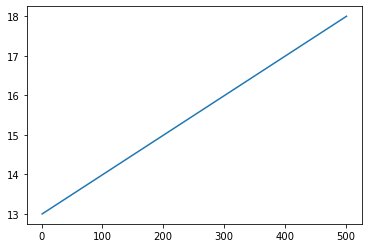

In [6]:
def MDS():
    print("MDS")
    OS = np.arange(1,1000,500)

    accs = []
    for oss in tqdm.tqdm(OS):
        mds = manifold.MDS(n_components=oss, n_init=1, max_iter=100)
        x_proj = mds.fit_transform(np.vstack((trainx, testx)))
        knn = KNN(x_proj[:trainx.shape[0]], trainy, x_proj[trainx.shape[0]:], [7])

        temp_acc = np.round(np.count_nonzero(knn[7] == testy)/len(testy),2)*100
        accs.append(temp_acc)
        print(f"KNN accuracy: {temp_acc} % on {oss} components")

    accuracy_plot(OS, accs)
    
MDS()

In [10]:
print(trainx.shape, testx.shape)

(6700, 3072) (3300, 3072)


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

tSNE


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [11:36<00:00, 696.28s/it]

KNN accuracy: 18.0 % 


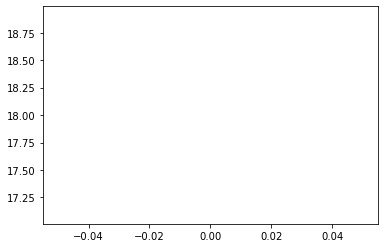

In [8]:
def tSNE():
    print("tSNE")
    OS = [0]

    accs = []
    for oss in tqdm.tqdm(OS):
        tsne = manifold.TSNE(n_components=2, init='pca')
        x_proj = tsne.fit_transform(np.vstack((trainx, testx)))
#         x_test_proj = tsne.transform(testx)
        knn = KNN(x_proj[:trainx.shape[0]], trainy, x_proj[trainx.shape[0]:], [7])

        temp_acc = np.round(np.count_nonzero(knn[7] == testy)/len(testy),2)*100
        accs.append(temp_acc)
        print(f"KNN accuracy: {temp_acc} % ")

    accuracy_plot(OS, accs)
    
tSNE()